# Jordan–Wigner Sanity Check Demo

This notebook demonstrates that the expectation value of $\sigma_z$ on the first qubit of a two–qubit chain obtained from a direct wavefunction simulation is reproduced by the correlation–matrix approach derived from the Jordan–Wigner (JW) transformation.  


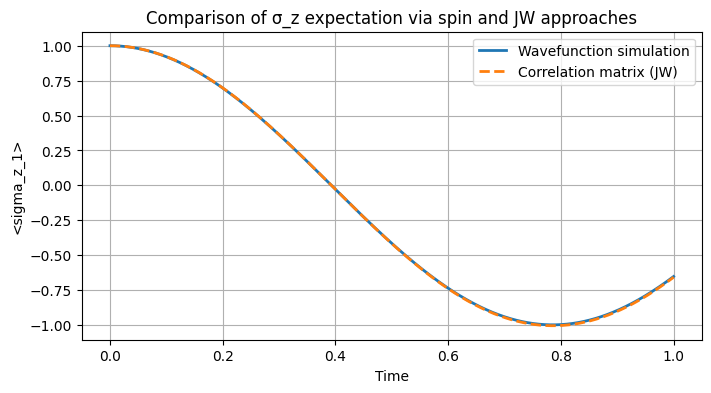

Maximum absolute difference: 6.604e-03


In [1]:
from jw_H_XY import wavefunction_magnetization, corr_magnetization
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
J = 1.0
T = 1.0
steps = 1000

# Compute magnetization from both methods
times_wave, m_wave = wavefunction_magnetization(J=J, T=T, steps=steps, initial_state='01')
times_corr, m_corr = corr_magnetization(J=J, T=T, steps=steps, L=2, occ=[0,1])

# Ensure the time arrays match
assert np.allclose(times_wave, times_corr)

# Plot the results
plt.figure(figsize=(8, 4))
plt.plot(times_wave, m_wave, label='Wavefunction simulation', lw=2)
plt.plot(times_corr, m_corr, '--', label='Correlation matrix (JW)', lw=2)
plt.xlabel('Time')
plt.ylabel(r'<sigma_z_1>')
plt.title('Comparison of σ_z expectation via spin and JW approaches')
plt.legend()
plt.grid(True)
plt.show()

# Compute and display the maximum absolute difference between the curves
max_diff = np.max(np.abs(m_wave - m_corr))
print(f"Maximum absolute difference: {max_diff:.3e}")


## XX Hamiltonian (X⊗X) vs correlation matrix

We now compare the XX Hamiltonian using two solvers: (1) diagonalization and (2) explicit Euler time stepping without diagonalization, against the correlation-matrix result from the free-fermion representation (1 + 2·G[0,0]).

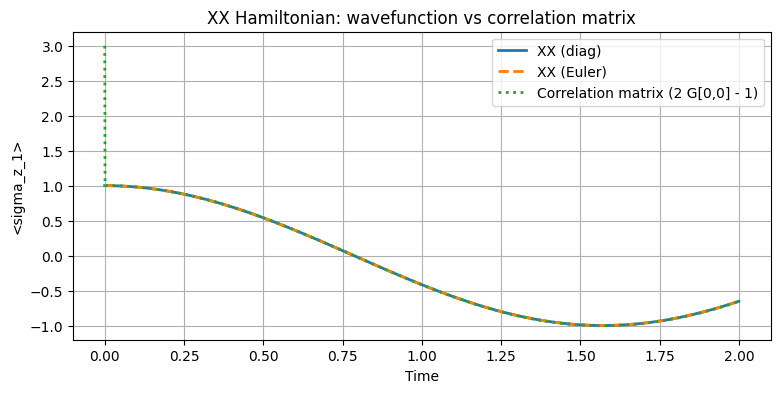

Max |XX(diag) - corr| = 2.000e+00
Max |XX(Euler) - corr| = 2.000e+00
Max |XX(diag) - XX(Euler)| = 1.009e-06


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from jw_H_XX import wavefunction_magnetization as wf_xx, corr_magnetization as corr_xx
from jw_H_XX_euler import wavefunction_magnetization as wf_xx_euler, corr_magnetization as corr_xx_euler

# Parameters
J = 1.0
T = 2.0
steps = 2000  # use sufficiently fine steps for Euler accuracy

# Compute XX via diagonalization
t_wf_xx, m_wf_xx = wf_xx(J=J, T=T, steps=steps, initial_state='00')
# Compute XX via Euler
t_eu_xx, m_eu_xx = wf_xx_euler(J=J, T=T, steps=steps, initial_state='00')
# Compute correlation-matrix values (should be consistent across both XX modules)
t_corr_xx, m_corr_xx = corr_xx(J=J, T=T, steps=steps, L=2)
t_corr_xx2, m_corr_xx2 = corr_xx_euler(J=J, T=T, steps=steps, L=2)
assert np.allclose(t_wf_xx, t_eu_xx) and np.allclose(t_wf_xx, t_corr_xx) and np.allclose(t_corr_xx, t_corr_xx2)

# Plot
plt.figure(figsize=(9, 4))
plt.plot(t_wf_xx, m_wf_xx, label='XX (diag)', lw=2)
plt.plot(t_eu_xx, m_eu_xx, '--', label='XX (Euler)', lw=2)
plt.plot(t_corr_xx, m_corr_xx, ':', label='Correlation matrix (2 G[0,0] - 1)', lw=2)
plt.xlabel('Time')
plt.ylabel(r'<sigma_z_1>')
plt.title('XX Hamiltonian: wavefunction vs correlation matrix')
plt.legend()
plt.grid(True)
plt.show()

# Report max differences
def max_abs(a, b): return float(np.max(np.abs(np.asarray(a) - np.asarray(b))))
print('Max |XX(diag) - corr| =', f'{max_abs(m_wf_xx, m_corr_xx):.3e}')
print('Max |XX(Euler) - corr| =', f'{max_abs(m_eu_xx, m_corr_xx):.3e}')
print('Max |XX(diag) - XX(Euler)| =', f'{max_abs(m_wf_xx, m_eu_xx):.3e}')
